<a href="https://colab.research.google.com/github/dtd11/SKT-AI-/blob/main/DeepLearningFinalProblem_Team3_YangSeongWoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug Euphemism Detection Project Using Variable Models**

# Start with BERT (Bidirectional Encoder Representations from Transformers).

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

2023-12-04 18:03:52.627006: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-04 18:03:52.628061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 18:03:52.647065: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 18:03:52.647837: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 18:03:52.943121: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

GPU device not found


2023-12-04 18:03:53.867554: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-04 18:03:53.867732: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 4080


In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv("training.csv", header=None)

In [ ]:
train_df

,0,1
0,1,"Now that she's using meth again, she's drinkin..."
1,1,"Codeine, hydromorphone, oxymorphone, GBL/GHB, ..."
2,1,The drug I found myself doing most often was GHB.
3,1,Got addicted again with alcohol and GHB again.
4,1,"he currently uses party drugs like Ketamine, G..."
...,...,...
995,0,"I ate too much for 2 or 3 days, not crazy amou..."
996,0,"I can feel, and i know the damage i've done to..."
997,0,"Haven't played dayz xbox in a long while, surp..."
998,0,"I knew that story already, it was stupid of me..."


In [ ]:
train_df.iloc[0][1]

"Now that she's using meth again, she's drinking alcohol still, taking meth and not sleeping most nights, taking other drugs such as ghb and possibly other things that she may be hiding, I'm not sure."

In [ ]:
test_df = pd.read_csv("test.csv", header=None)

In [ ]:
test_df.shape

(117, 2)

In [ ]:
test_df.head()

,0,1
0,1,"I've been abusing acid, shrooms, and ecstasy f..."
1,1,"Later in April, I did acid at school and spent..."
2,1,"I’ve lost friends trying to get sober, I’ve lo..."
3,1,"Lean/codeine and pills where his thing, along ..."
4,1,"For reference, in a month she smoked 1oz of gr..."


In [ ]:
train_df[0] = (train_df[0] == 2).astype(int)
test_df[0] = (test_df[0] == 2).astype(int)

train_df.head(12)

,0,1
0,0,"Unfortunately, the frustration of being Dr. Go..."
1,1,Been going to Dr. Goldberg for over 10 years. ...
2,0,I don't know what Dr. Goldberg was like before...
3,0,I'm writing this review to give you a heads up...
4,1,All the food is great here. But the best thing...
5,0,Wing sauce is like water. Pretty much a lot of...
6,0,Owning a driving range inside the city limits ...
7,0,This place is absolute garbage... Half of the...
8,1,Before I finally made it over to this range I ...
9,1,I drove by yesterday to get a sneak peak. It ...


In [ ]:
test_df.head()

,0,1
0,1,"Contrary to other reviews, I have zero complai..."
1,0,Last summer I had an appointment to get new ti...
2,1,"Friendly staff, same starbucks fair you get an..."
3,0,The food is good. Unfortunately the service is...
4,1,Even when we didn't have a car Filene's Baseme...


Add column name for better representation

In [ ]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df[0],
    "sentence": train_df[1].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,"Now that she's using meth again, she's drinkin..."
1,1,1,"Codeine, hydromorphone, oxymorphone, GBL/GHB, ..."
2,2,1,The drug I found myself doing most often was GHB.
3,3,1,Got addicted again with alcohol and GHB again.
4,4,1,"he currently uses party drugs like Ketamine, G..."


In [ ]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df[0],
    "sentence": test_df[1].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,"I've been abusing acid, shrooms, and ecstasy f..."
1,1,1,"Later in April, I did acid at school and spent..."
2,2,1,"I’ve lost friends trying to get sober, I’ve lo..."
3,3,1,"Lean/codeine and pills where his thing, along ..."
4,4,1,"For reference, in a month she smoked 1oz of gr..."


In [ ]:

train_df_bert

,id,label,sentence
0,0,1,"Now that she's using meth again, she's drinkin..."
1,1,1,"Codeine, hydromorphone, oxymorphone, GBL/GHB, ..."
2,2,1,The drug I found myself doing most often was GHB.
3,3,1,Got addicted again with alcohol and GHB again.
4,4,1,"he currently uses party drugs like Ketamine, G..."
...,...,...,...
995,995,0,"I ate too much for 2 or 3 days, not crazy amou..."
996,996,0,"I can feel, and i know the damage i've done to..."
997,997,0,"Haven't played dayz xbox in a long while, surp..."
998,998,0,"I knew that story already, it was stupid of me..."


As dataset have large amount of data, we will select 10000 and 3000 data for train and test respectively.

In [ ]:
train_df_bert = train_df_bert.iloc[0:10000]

In [ ]:
train_df_bert

,id,label,sentence
0,0,1,"Now that she's using meth again, she's drinkin..."
1,1,1,"Codeine, hydromorphone, oxymorphone, GBL/GHB, ..."
2,2,1,The drug I found myself doing most often was GHB.
3,3,1,Got addicted again with alcohol and GHB again.
4,4,1,"he currently uses party drugs like Ketamine, G..."
...,...,...,...
995,995,0,"I ate too much for 2 or 3 days, not crazy amou..."
996,996,0,"I can feel, and i know the damage i've done to..."
997,997,0,"Haven't played dayz xbox in a long while, surp..."
998,998,0,"I knew that story already, it was stupid of me..."


In [ ]:
test_df_bert = test_df_bert.iloc[0:3000]

In [ ]:
test_df_bert

,id,label,sentence
0,0,1,"I've been abusing acid, shrooms, and ecstasy f..."
1,1,1,"Later in April, I did acid at school and spent..."
2,2,1,"I’ve lost friends trying to get sober, I’ve lo..."
3,3,1,"Lean/codeine and pills where his thing, along ..."
4,4,1,"For reference, in a month she smoked 1oz of gr..."
...,...,...,...
112,112,0,taking the pizza box off the oven and showing ...
113,113,0,One afternoon I was tidying up some costumes i...
114,114,0,From my research many people use leather mushr...
115,115,0,Im kinda roleplaying a theme of having my char...


Extract the sentences and labels of our training and test set as numpy ndarrays.

In [ ]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [ ]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


Tokenization & Input Formatting

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/home/sujung/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading BERT tokenizer...


Tokenizer test

In [ ]:
# Print the original sentence.
print(' Original: ', train_sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[0])))

 Original:  Now that she's using meth again, she's drinking alcohol still, taking meth and not sleeping most nights, taking other drugs such as ghb and possibly other things that she may be hiding, I'm not sure.
Tokenized:  ['now', 'that', 'she', "'", 's', 'using', 'met', '##h', 'again', ',', 'she', "'", 's', 'drinking', 'alcohol', 'still', ',', 'taking', 'met', '##h', 'and', 'not', 'sleeping', 'most', 'nights', ',', 'taking', 'other', 'drugs', 'such', 'as', 'g', '##h', '##b', 'and', 'possibly', 'other', 'things', 'that', 'she', 'may', 'be', 'hiding', ',', 'i', "'", 'm', 'not', 'sure', '.']
Token IDs:  [2085, 2008, 2016, 1005, 1055, 2478, 2777, 2232, 2153, 1010, 2016, 1005, 1055, 5948, 6544, 2145, 1010, 2635, 2777, 2232, 1998, 2025, 5777, 2087, 6385, 1010, 2635, 2060, 5850, 2107, 2004, 1043, 2232, 2497, 1998, 4298, 2060, 2477, 2008, 2016, 2089, 2022, 6318, 1010, 1045, 1005, 1049, 2025, 2469, 1012]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  113


In [ ]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  110


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 300,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  Now that she's using meth again, she's drinking alcohol still, taking meth and not sleeping most nights, taking other drugs such as ghb and possibly other things that she may be hiding, I'm not sure.
Token IDs: tensor([ 101, 2085, 2008, 2016, 1005, 1055, 2478, 2777, 2232, 2153, 1010, 2016,
        1005, 1055, 5948, 6544, 2145, 1010, 2635, 2777, 2232, 1998, 2025, 5777,
        2087, 6385, 1010, 2635, 2060, 5850, 2107, 2004, 1043, 2232, 2497, 1998,
        4298, 2060, 2477, 2008, 2016, 2089, 2022, 6318, 1010, 1045, 1005, 1049,
        2025, 2469, 1012,  102,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids_test = []
attention_masks_test = []

# For every sentence...
for sent in test_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 300,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )

    # Add the encoded sentence to the list.
    input_ids_test.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_test.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_test = torch.cat(input_ids_test, dim=0)
attention_masks_test = torch.cat(attention_masks_test, dim=0)
labels_test = torch.tensor(test_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', test_sentences[0])
print('Token IDs:', input_ids_test[0])

Original:  I've been abusing acid, shrooms, and ecstasy for a while now but recently it’s gotten really bad.
Token IDs: tensor([  101,  1045,  1005,  2310,  2042,  8273,  7741,  5648,  1010, 14021,
        29020,  1010,  1998, 19069,  2005,  1037,  2096,  2085,  2021,  3728,
         2009,  1521,  1055,  5407,  2428,  2919,  1012,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0, 

**Training & Validation Split:** Divide up our training set to use 90% for training and 10% for validation.

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

  900 training samples
  100 validation samples


We'll also create an iterator for our dataset using the torch DataLoader class. This helps save on memory during training because, unlike a for loop, with an iterator the entire dataset does not need to be loaded into memory.

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

**Train Our Classification Model: BertForSequenceClassification**

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
bert = 'bert-large-uncased'
config = BertConfig.from_pretrained('bert-large-uncased', output_hidden_states=True, hidden_dropout_prob=0.2,
attention_probs_dropout_prob=0.2)
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

Just for curiosity's sake, we can browse all of the model's parameters by name here.
In the below cell, I've printed out the names and dimensions of the weights for:
The embedding layer.
The first of the twelve transformers.
The output layer.

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

**Optimizer & Learning Rate Scheduler**

*Now* that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, the authors recommend choosing from the following values (from Appendix A.3 of the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf)):

>- **Batch size:** 16, 32  
- **Learning rate (Adam):** 5e-5, 3e-5, 2e-5  
- **Number of epochs:** 2, 3, 4

We chose:
* Batch size: 32 (set when creating our DataLoaders)
* Learning rate: 2e-5
* Epochs: 4 (we'll see that this is probably too many...)

The epsilon parameter `eps = 1e-8` is "a very small number to prevent any division by zero in the implementation" (from [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)).

You can find the creation of the AdamW optimizer in `run_glue.py` [here](https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L109).

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

**Training Loop**

Below is our training loop. There's a lot going on, but fundamentally for each pass in our loop we have a trianing phase and a validation phase.

**Training:**
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Clear out the gradients calculated in the previous pass.
    - In pytorch the gradients accumulate by default (useful for things like RNNs) unless you explicitly clear them out.
- Forward pass (feed input data through the network)
- Backward pass (backpropagation)
- Tell the network to update parameters with optimizer.step()
- Track variables for monitoring progress

**Evalution:**
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Forward pass (feed input data through the network)
- Compute loss on our validation data and track variables for monitoring progress

Pytorch hides all of the detailed calculations from us, but we've commented the code to point out which of the above steps are happening on each line.

Define a helper function for calculating accuracy.

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Helper function for formatting elapsed times as hh:mm:ss

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

We're ready for the training!

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels).to_tuple()

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels).to_tuple()

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...

  Average training loss: 0.42
  Training epcoh took: 0:00:08

Running Validation...
  Accuracy: 0.99
  Validation Loss: 0.20
  Validation took: 0:00:00

======== Epoch 2 / 2 ========
Training...

  Average training loss: 0.10
  Training epcoh took: 0:00:08

Running Validation...
  Accuracy: 0.99
  Validation Loss: 0.05
  Validation took: 0:00:00

Training complete!
Total training took 0:00:16 (h:mm:ss)


Summary of the training process.

In [ ]:

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

OptionError: 'Pattern matched multiple keys'

Notice that, while the the training loss is going down with each epoch, the validation loss is increasing! This suggests that we are training our model too long, and it's over-fitting on the training data.
(For reference, we are using 9000 training samples and 1000 validation samples).
Validation Loss is a more precise measure than accuracy, because with accuracy we don't care about the exact output value, but just which side of a threshold it falls on.
If we are predicting the correct answer, but with less confidence, then validation loss will catch this, while accuracy will not.

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

UsageError: Line magic function `%` not found.


**Performance On Test Set**

In [ ]:
# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(input_ids_test, attention_masks_test, labels_test)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids_test)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 117 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (test_df_bert.label.sum(), len(test_df_bert.label), (test_df_bert.label.sum() / len(test_df_bert.label) * 100.0)))

Positive samples: 44 of 117 (37.61%)


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0"
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

  # Calculate and store the coef for this batch.
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (0 to 1)')
plt.xlabel('Batch #')

plt.show()

NameError: name 'sns' is not defined

In [ ]:
# Combine the results across all batches.
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.648


To maximize the score, we should remove the "validation set" (which we used to help determine how many epochs to train for) and train on the entire training set.

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

# CNN Classifiers

Load the previous train test data for applying new algorithm. And split data for further process.

In [ ]:
train_df_bert.head()

,id,label,sentence
0,0,1,"Now that she's using meth again, she's drinkin..."
1,1,1,"Codeine, hydromorphone, oxymorphone, GBL/GHB, ..."
2,2,1,The drug I found myself doing most often was GHB.
3,3,1,Got addicted again with alcohol and GHB again.
4,4,1,"he currently uses party drugs like Ketamine, G..."


In [ ]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

**Text preprocessing and sequence preprocessing:** Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. You can add the parameter num_words, which is responsible for setting the size of the vocabulary. The most common num_words words will be then kept.

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)


In [ ]:
from keras.preprocessing import sequence
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 1400

x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (1000, 1400)
X_test shape: (117, 1400)


**Define the model Architecture**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding

# 3 - Neural network model design
print('Building model')
max_features = 5000
embedding_vector_length = 128

filters = 250
kernel_size = 3
hidden_dims = 125

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
#model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))
#model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Building model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1400, 128)         640000    
                                                                 
 conv1d (Conv1D)             (None, 1398, 250)         96250     
                                                                 
 global_max_pooling1d (Glob  (None, 250)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 125)               31375     
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 126       
                                         

2023-12-04 18:07:58.462115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-04 18:07:58.462251: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


**Train and Evaluate**

In [ ]:
# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(x_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.6923


**Visualization of result**

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


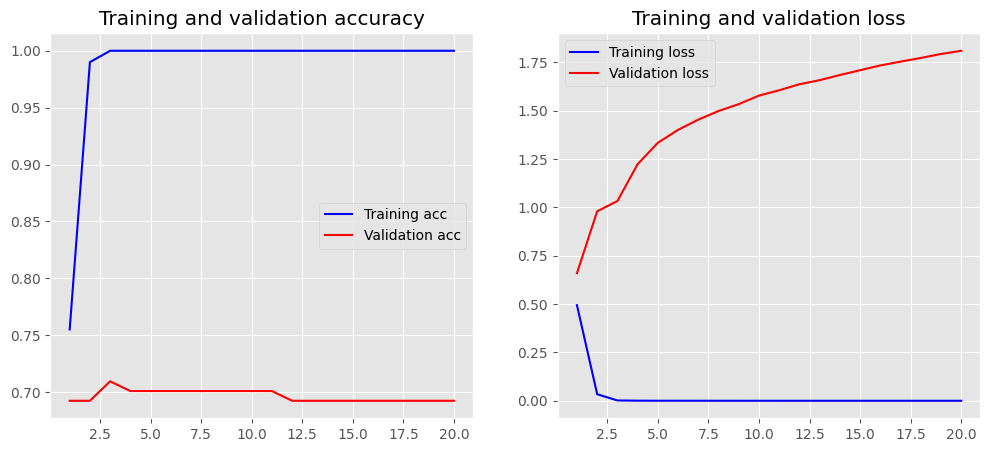

In [ ]:
plot_history(history)

**CNN-LSTM**

In [ ]:
# 3 - Neural network model design
print('Building model')

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Building model
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1400, 32)          160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 1400, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 700, 32)           0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 216405 (845.33 KB)
Trainable params: 216405 (845.33 KB)
Non-trainable params: 0 (0.00 Byte)

Training Accuracy: 1.0000
Testing Accuracy:  0.8205


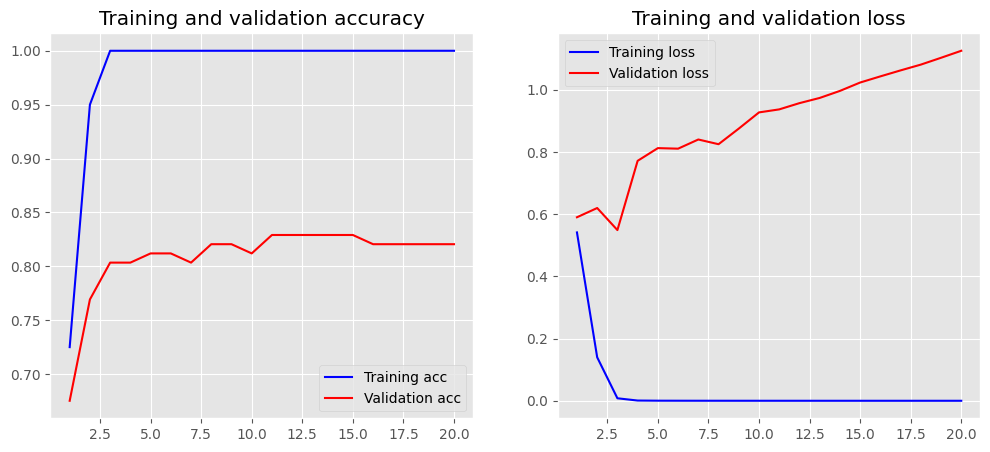

In [ ]:
#  - Train the neural network model
history1 = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(x_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history1)

# Optimization of CNN and CNNLSTM

In [ ]:
max_features = 5000
def CreateModel(epoch,network,optimizer):
  if network == 'CNN':

    # 3 - Neural network model design
    print('Building model')

    embedding_vector_length = 128

    filters = 250
    kernel_size = 3
    hidden_dims = 125

    model = Sequential()
    model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
    #model.add(Dropout(0.2))
    model.add(Conv1D(filters,
                    kernel_size,
                    padding='valid',
                    activation='relu',
                    strides=1))
    model.add(GlobalMaxPooling1D())

    model.add(Dense(hidden_dims))
    #model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()
  if network == 'CNNLSTM':
    print('Building model')

    embedding_vector_length = 32

    model = Sequential()
    model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()
  return model



In [ ]:
def finalEvaluation(epoch,network,optimizer):
  model = CreateModel(epoch,network,optimizer)
  history = model.fit(x_train, y_train,
                    epochs=epoch,
                    verbose=False,
                    validation_data=(x_test, y_test),
                    batch_size=10)
  loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
  print("Training Accuracy: {:.4f}".format(accuracy))
  loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
  print("Testing Accuracy:  {:.4f}".format(accuracy))
  plot_history(history)

Building model
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1400, 32)          160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 1400, 32)          3104      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 700, 32)           0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 216405 (845.33 KB)
Trainable params: 216405 (845.33 KB)
Non-trainable params: 0 (0.00 Byte)

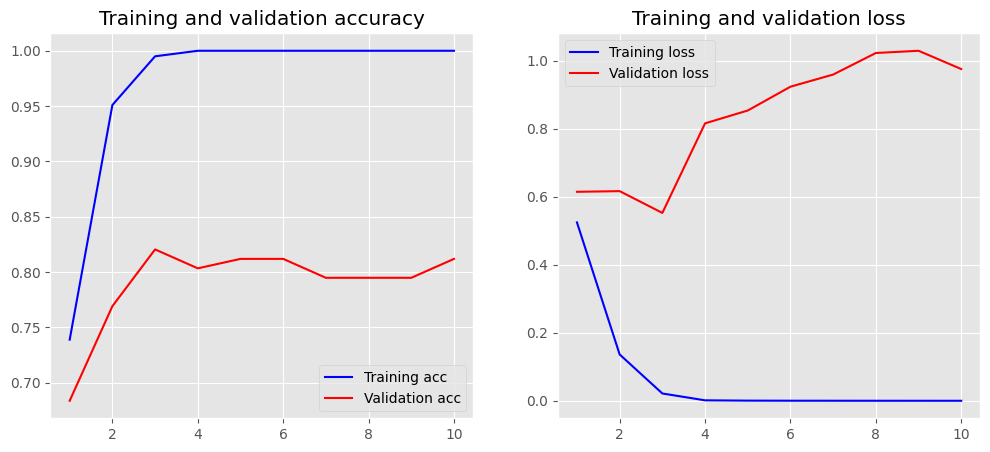

In [ ]:
finalEvaluation(10,'CNNLSTM','Nadam')

Building model
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1400, 32)          160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 1400, 32)          3104      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 700, 32)           0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 216405 (845.33 KB)
Trainable params: 216405 (845.33 KB)
Non-trainable params: 0 (0.00 Byte)

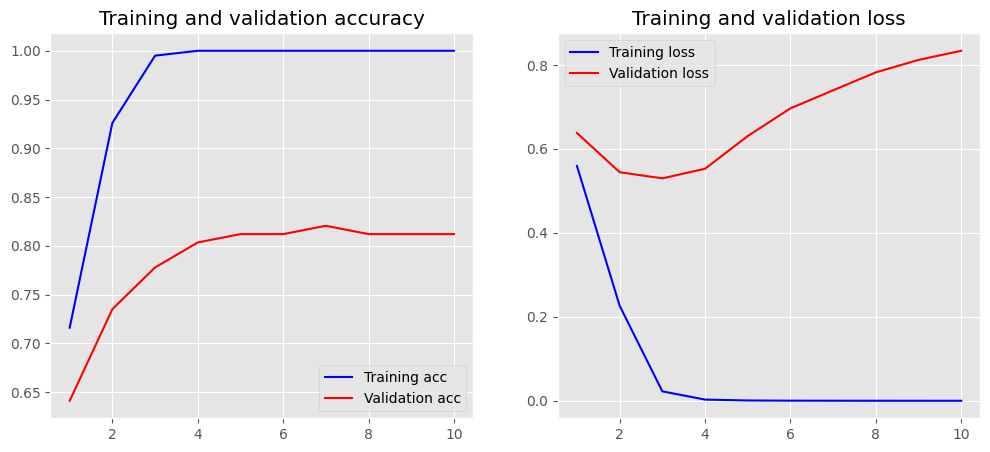

In [ ]:
finalEvaluation(10,'CNNLSTM','rmsprop')

Building model
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1400, 32)          160000    
                                                                 
 conv1d_4 (Conv1D)           (None, 1400, 32)          3104      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 700, 32)           0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 216405 (845.33 KB)
Trainable params: 216405 (845.33 KB)
Non-trainable params: 0 (0.00 Byte)

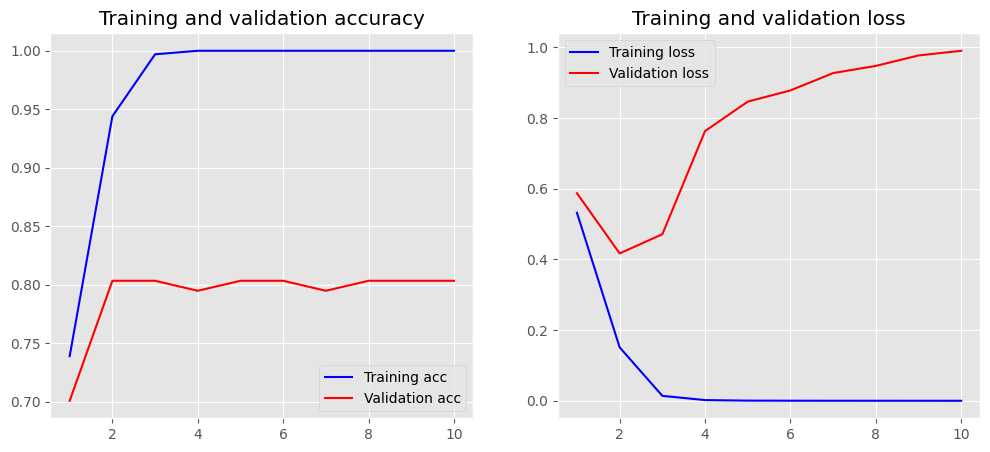

In [ ]:
finalEvaluation(10,'CNNLSTM','SGD')

Building model
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1400, 128)         640000    
                                                                 
 conv1d_5 (Conv1D)           (None, 1398, 250)         96250     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 250)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 125)               31375     
                                                                 
 activation_2 (Activation)   (None, 125)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 126       
                                       

Training Accuracy: 0.6990
Testing Accuracy:  0.6239


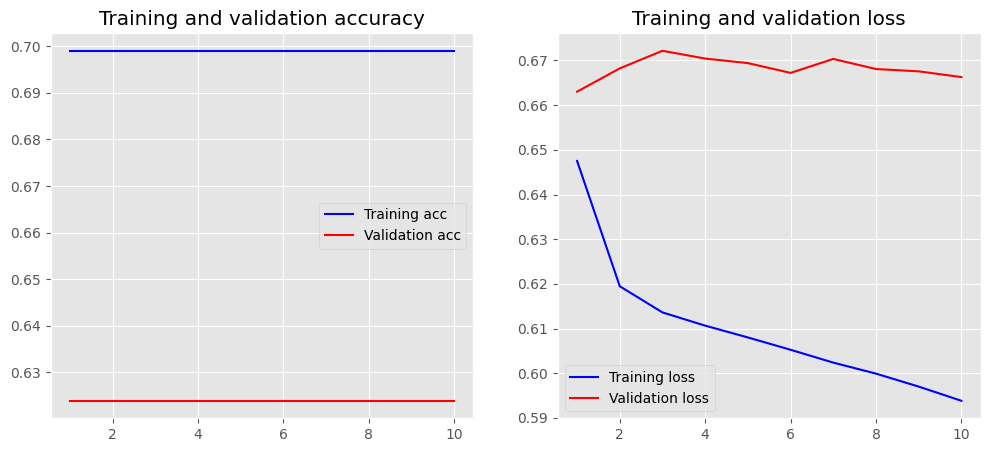

In [ ]:
finalEvaluation(10,'CNN','SGD')

Building model
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1400, 128)         640000    
                                                                 
 conv1d_6 (Conv1D)           (None, 1398, 250)         96250     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 250)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 125)               31375     
                                                                 
 activation_4 (Activation)   (None, 125)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 126       
                                       

Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training Accuracy: 1.0000
Testing Accuracy:  0.7265


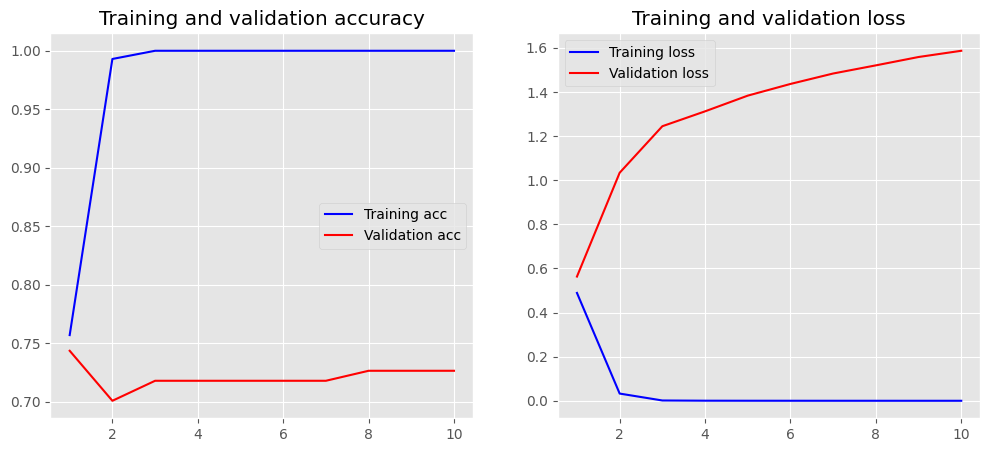

In [ ]:
finalEvaluation(10,'CNN','adam')

Building model
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1400, 128)         640000    
                                                                 
 conv1d_7 (Conv1D)           (None, 1398, 250)         96250     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 250)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 125)               31375     
                                                                 
 activation_6 (Activation)   (None, 125)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 126       
                                       

Training Accuracy: 1.0000
Testing Accuracy:  0.6838


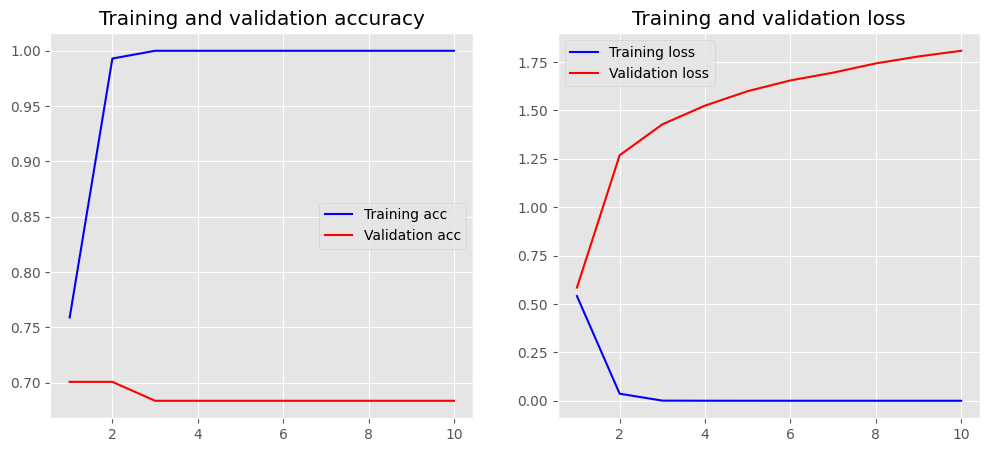

In [ ]:
finalEvaluation(10,'CNN','Nadam')

Building model
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1400, 128)         640000    
                                                                 
 conv1d_8 (Conv1D)           (None, 1398, 250)         96250     
                                                                 
 global_max_pooling1d_4 (Gl  (None, 250)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 125)               31375     
                                                                 
 activation_8 (Activation)   (None, 125)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 126       
                                       

Training Accuracy: 1.0000
Testing Accuracy:  0.6581


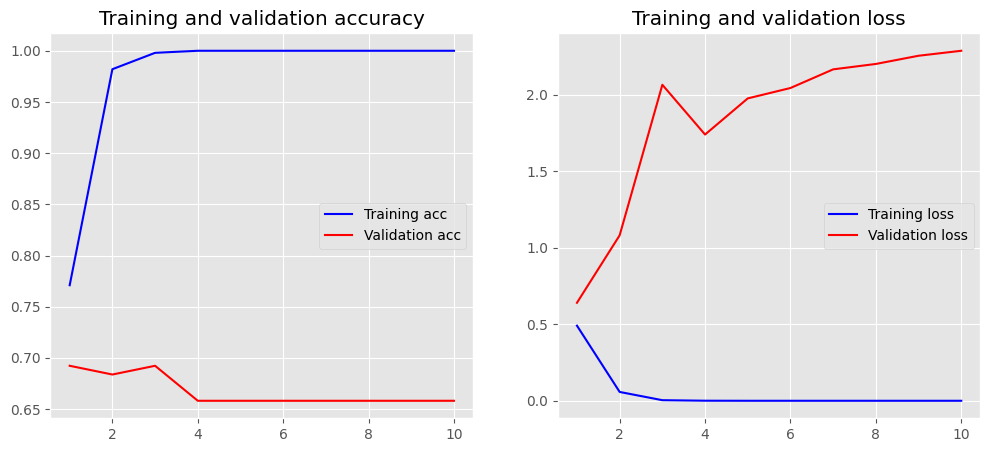

In [ ]:
finalEvaluation(10,'CNN','rmsprop')